## Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок

In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [2]:
sigma = 15  # Стандартное отклонение
Z = 2.241  #  %   # Квантиль нормального распределения (двухсторонняя область)
Delta = 3 #%         #Погрешность

In [3]:
### код/вычисления 
n = int(((sigma*Z)/Delta)**2)
n


125

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

Доверительный интервал имеет вид (¯x − Δ; ¯x + Δ).

Уровень доверия равен β = 0.98, поэтому α = 0.02.

По таблице нормального распределения находим 1 − α /2 = 0.99 и определяем квантиль z_α = 2.576.

Теперь можем найти точность Δ = (σ /√n)* z_α = (15/√25)*2.576 ≈ 7.728.

Искомый 98%-доверительный интервал имеет вид (30 - 7.728 ; 130 + 7.728) = (122.272 ; 137.728).
Его длина L = 15.456

In [4]:
n = 25      # объем выборки
sigma = 15  # стандартное отклонение
x_ср = 130  # среднее значение по выборке
Z = 2.576   #  %  # Квантиль нормального распределения (двухсторонняя область)

In [5]:
###  код/вычисления

Delta = (sigma/np.sqrt(n))*Z
range1 = x_ср - Delta
range2 = x_ср + Delta
L = range2 - range1


print('Искомый 98%-доверительный интервал имеет вид (', x_ср, '-', Delta, ';', x_ср, '+', Delta, ')', '(', range1, ';', range2, ')', '\n' 'Его длина L =', "%.3f" % L )

Искомый 98%-доверительный интервал имеет вид ( 130 - 7.728 ; 130 + 7.728 ) ( 122.272 ; 137.728 ) 
Его длина L = 15.456


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [6]:
import scipy.stats as stats
from scipy import stats

population_men = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
population = np.concatenate((population_men, population_women))
population.mean()

19.038724586340876

In [7]:
stats.ttest_ind(a=population_men, b=population_women, equal_var=False)

Ttest_indResult(statistic=2.2076041079922297, pvalue=0.02729068816571)

Значение pvalue= 0.0012 меньше 0,05 и говорит о том, что существует вероятность 0.12%, что данные выборки далеко друг от друга для двух одинаковых групп. Это меньше, чем уровень значимости 1%. Это доказывает, что средние значения двух распределений различны и различие статистически незначимо.

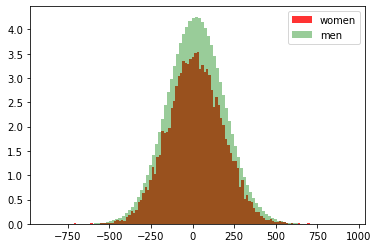

In [8]:
weights_x = np.ones_like(population_women)/len(population_women) * 100
weights_y = np.ones_like(population_men)/len(population_men) * 100

plt.hist(population_women, bins=100, weights=weights_x, alpha = 0.8, color = 'r',  label = 'women')
plt.hist(population_men, bins=100, weights=weights_y, alpha = 0.4, color = 'g', label = 'men')
plt.legend(loc = 'upper right')
plt.show()

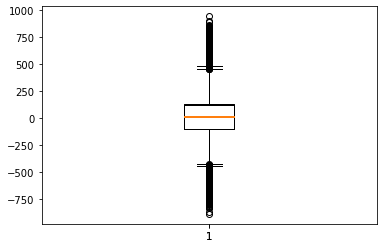

In [9]:
plt.boxplot(population_men);
plt.boxplot(population_women);

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [10]:
sigma = 150  # Стандартное отклонение
Z = 2.241  #  %   # Квантиль нормального распределения (двухсторонняя область область)
Delta = 50  # % # Погрешность

In [11]:
### код/вычисления 
n = int(((sigma*Z)/Delta)**2)
n

45

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [12]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [13]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations) #Возможно пригодится эта функция.

oddsratio, pvalue


(0.5811965811965812, 0.35417955365927367)

In [14]:
chi, pval, dof, exp = stats.chi2_contingency(observations) 
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = stats.chi2.ppf(p, dof)
print('chi=%.6f, критическоре значение=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""На %.2f уровне значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.""" % (significance))
else:
    print("""На %.2f уровне значимости, мы принимаем нулевые гипотезы. 
        Они независимы.""" % (significance))

p-value is:  0.35396880166541644
chi=0.859178, критическоре значение=3.841459

На 0.05 уровне значимости, мы принимаем нулевые гипотезы. 
        Они независимы.


In [15]:
chi, pval, dof, exp = stats.chi2_contingency(observations)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.353969, significance=0.05

На 0.05 уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.


Исходя из приведенных для анализа данных, волшебник может предсказывать погоду 

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [16]:
def mean_confidence_interval(data, confidence=0.90): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [17]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [18]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [19]:
t, p = stats.ttest_ind(data_1, data_2) # Т-тест

t, p

(7.35744682757447, 2.1159475572725764e-11)

In [20]:
stats.ttest_ind(a=data_1, b=data_2, equal_var=False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

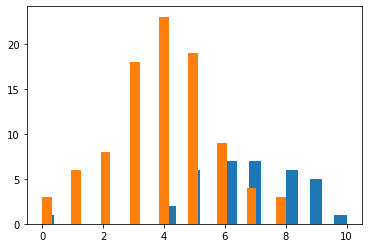

In [21]:
plt.hist(data_1, bins=25); #Выборка data_1
plt.hist(data_2, bins=25);  #Выборка data_2

Видно, что выборки принадлежат разным распределениям

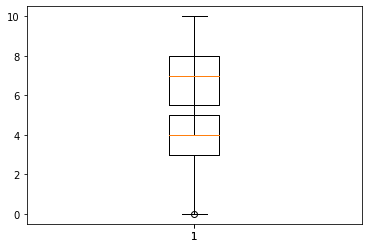

In [22]:
plt.boxplot(data_1);
plt.boxplot(data_2);

Принадлежность выборок разным распределениям подтверждается и различающимися boxplot при отсутствии значительных выбросов

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Вывод: р-value < 0.05, следовательно мы можем отвергнуть нулевую гипотезу о том, что распределение нормальное. Выборки отличаются, распределение не нормальное

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [23]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test


In [24]:
stats.ttest_ind(a=A, b=B, equal_var=False)   

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

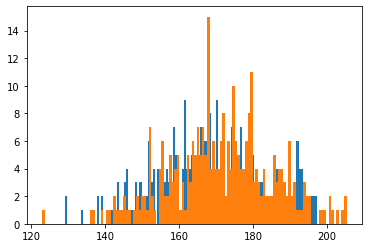

In [25]:
plt.hist(A, bins=120);
plt.hist(B, bins=120);

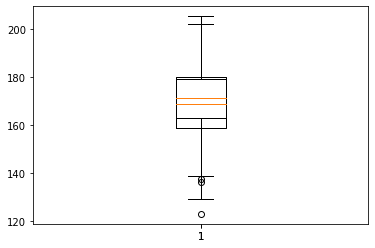

In [26]:
plt.boxplot(A);
plt.boxplot(B);

pvalue=0.0512, что незначительно больше установленного уровня значимости в 0.05. Результат неоднозначный, можно предположить, что различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики. Различия подтверждаются и boxplot.

In [27]:
AB=np.concatenate((A, B))
AB.mean()

170.1379867211236

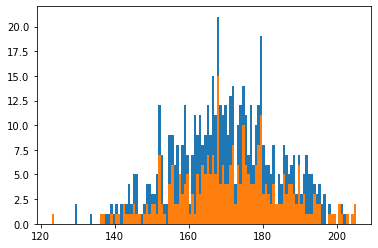

In [28]:
plt.hist(AB, bins=120);
plt.hist(B, bins=120);

In [29]:
stats.ttest_ind(a=A, b=AB, equal_var=False)   

Ttest_indResult(statistic=-1.11629813919991, pvalue=0.26474740019324844)

In [31]:
stats.ttest_ind(a=B, b=AB, equal_var=False)   

Ttest_indResult(statistic=1.1373740178854457, pvalue=0.255830714719079)